# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys2 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

        
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | piripiri
Processing Record 4 of Set 1 | vernon
Processing Record 5 of Set 1 | taghazout
Processing Record 6 of Set 1 | kuta
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | darwin
Processing Record 9 of Set 1 | zuunmod
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | velikiy ustyug
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | myaydo
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | ambositra
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,286.29,83,100,4.12,US,1703253227
1,isafjordur,66.0755,-23.1240,271.17,74,100,7.20,IS,1703253364
2,piripiri,-4.2733,-41.7769,309.02,32,7,4.12,BR,1703253364
3,vernon,50.2581,-119.2691,279.04,89,100,1.54,CA,1703253176
4,taghazout,30.5426,-9.7112,296.58,34,0,4.07,MA,1703253364


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,286.29,83,100,4.12,US,1703253227
1,isafjordur,66.0755,-23.1240,271.17,74,100,7.20,IS,1703253364
2,piripiri,-4.2733,-41.7769,309.02,32,7,4.12,BR,1703253364
3,vernon,50.2581,-119.2691,279.04,89,100,1.54,CA,1703253176
4,taghazout,30.5426,-9.7112,296.58,34,0,4.07,MA,1703253364


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

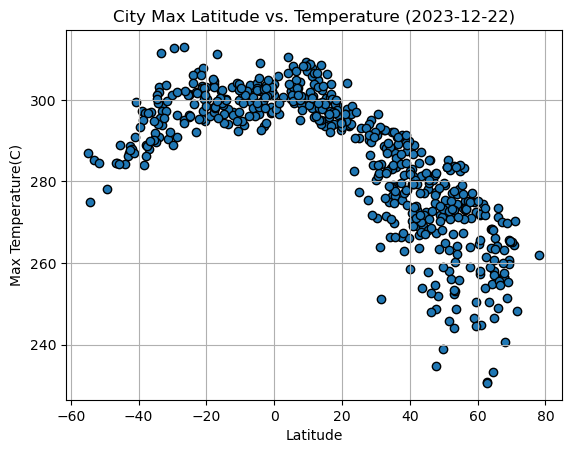

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df ['Lat'], city_data_df ['Max Temp'], edgecolors="black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-12-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True) 

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

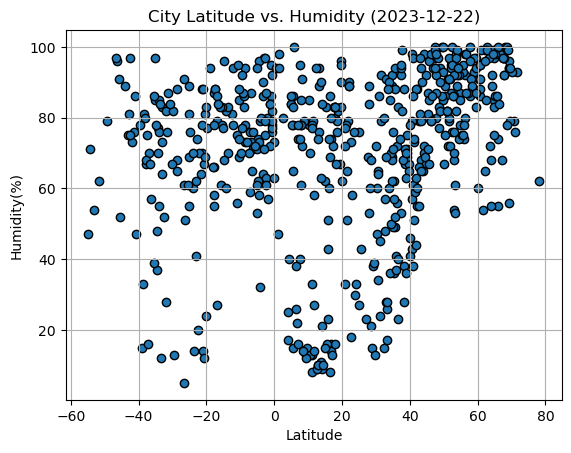

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df ['Lat'], city_data_df ['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True) 

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

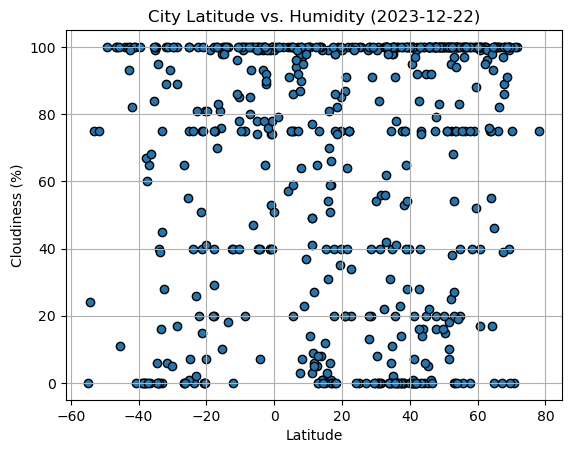

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df ['Lat'], city_data_df ['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

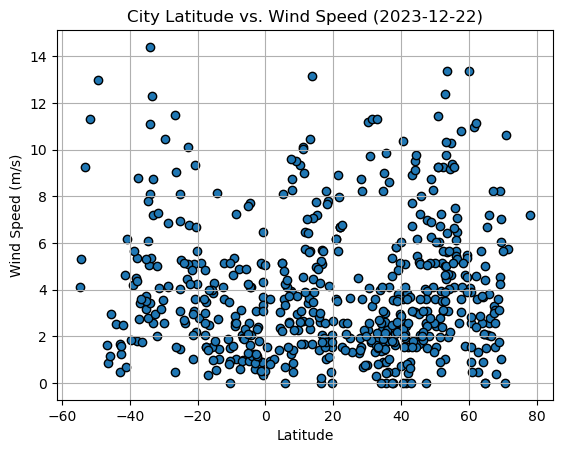

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df ['Lat'], city_data_df ['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,286.29,83,100,4.12,US,1703253227
1,isafjordur,66.0755,-23.1240,271.17,74,100,7.20,IS,1703253364
3,vernon,50.2581,-119.2691,279.04,89,100,1.54,CA,1703253176
4,taghazout,30.5426,-9.7112,296.58,34,0,4.07,MA,1703253364
6,ilulissat,69.2167,-51.1000,260.16,56,40,8.23,GL,1703253365


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,piripiri,-4.2733,-41.7769,309.02,32,7,4.12,BR,1703253364
5,kuta,-8.7233,115.1723,301.12,78,20,1.03,ID,1703253365
7,darwin,-12.4611,130.8418,303.14,81,40,4.12,AU,1703253308
10,east london,-33.0153,27.9116,298.67,73,75,8.75,ZA,1703253366
11,puerto ayora,-0.7393,-90.3518,297.31,82,78,4.32,EC,1703253366


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7111640786918745


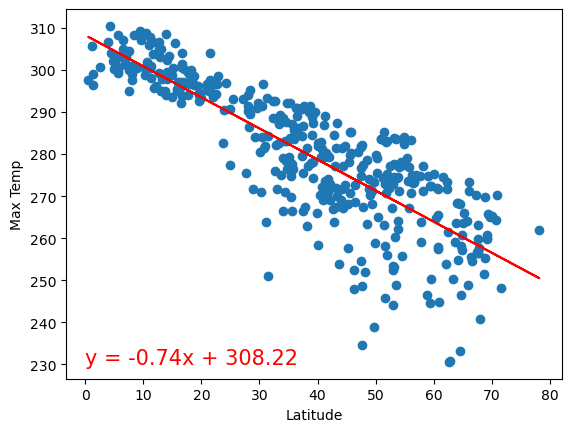

In [58]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Max Temp']
plot_linear_regression(x_values_northern, y_values_northern, 'Max Temp', (0,230))

The r-value is: 0.35806024760457317


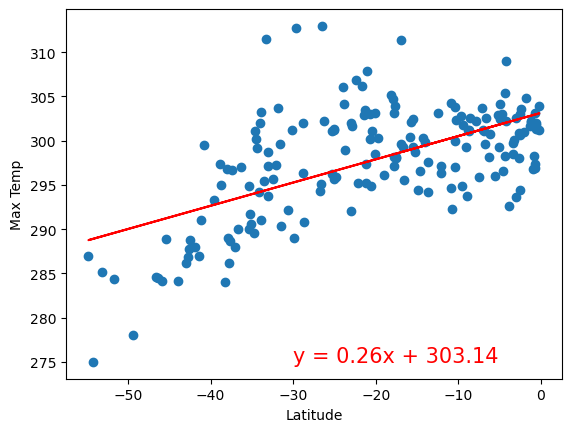

In [59]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Max Temp']
plot_linear_regression(x_values_southern, y_values_southern, 'Max Temp', (-30,275))

**Discussion about the linear relationship:** 
With the r-value being 0.35 for the above relationship, we know that this is a weaker positive linear relationship. We do see some positive association between the variables, it is not strong enough to make meaningful predictions based on this linear model.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22159958289414114


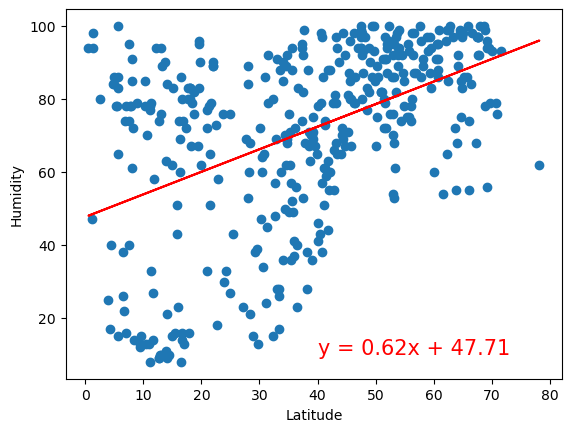

In [61]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Humidity']
plot_linear_regression(x_values_northern, y_values_northern, 'Humidity', (40,10))

The r-value is: 0.0351322617682873


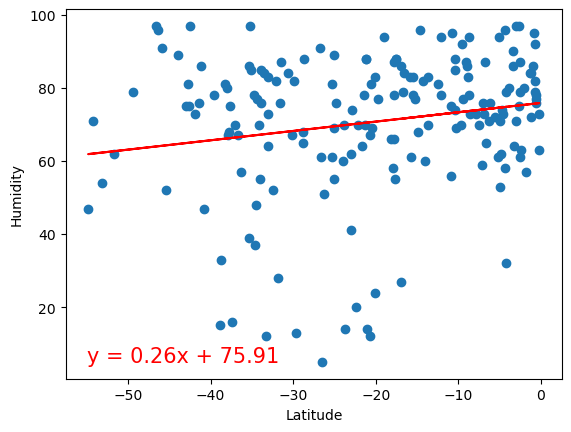

In [64]:
# Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Humidity']
plot_linear_regression(x_values_southern, y_values_southern, 'Humidity', (-55,5))

**Discussion about the linear relationship:** 
With the r-value being 0.03 for the above relationship, we know that this is a very weak positive linear relationship. We do see some positive association between the variables, it is not strong enough to make meaningful predictions based on this linear model.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02181763870249073


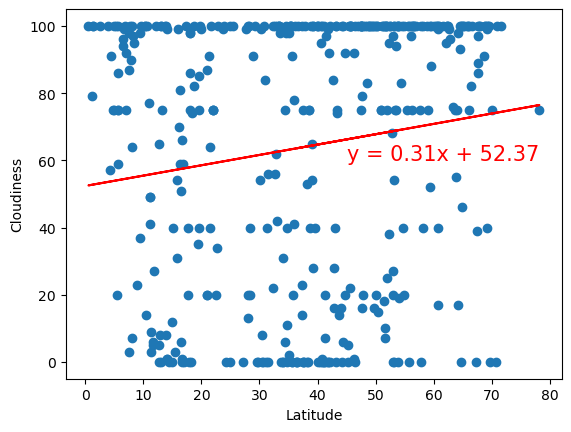

In [66]:
# Northern Hemisphere
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values_northern, y_values_northern, 'Cloudiness', (45,60))

The r-value is: 0.06805084391411197


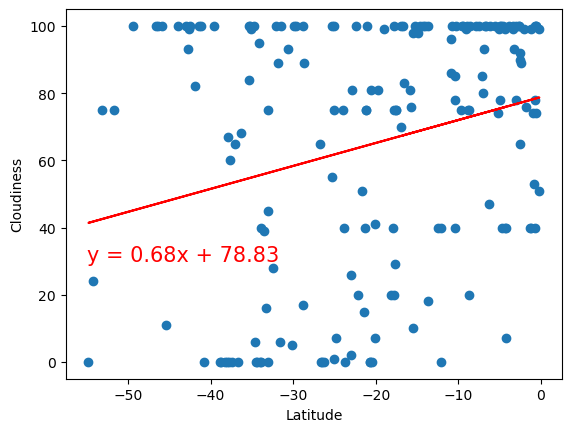

In [70]:
# Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values_southern, y_values_southern, 'Cloudiness', (-55,30))

**Discussion about the linear relationship:** 
With the r-value being 0.06 for the above relationship, we know that this is a very weak positive linear relationship. It is not strong enough to make meaningful predictions based on this linear model.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005883661907145675


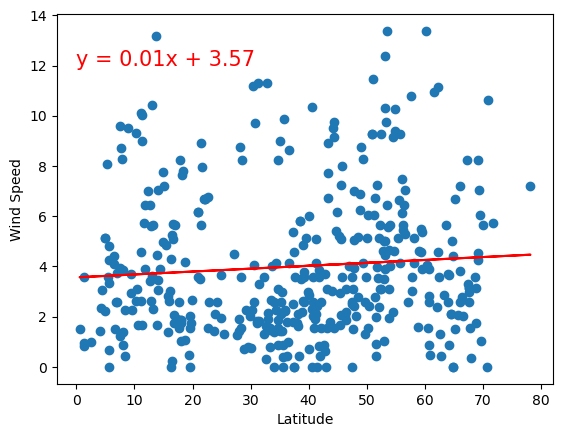

In [71]:
# Northern Hemisphere
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values_northern, y_values_northern, 'Wind Speed', (0,12))

The r-value is: 0.11329749216336225


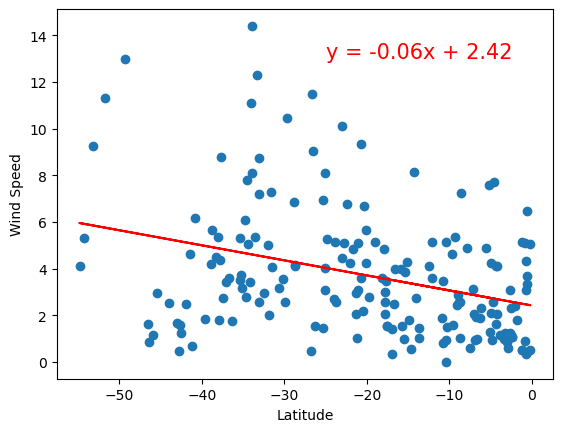

In [75]:
# Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values_southern, y_values_southern, 'Wind Speed', (-25,13))

**Discussion about the linear relationship:** 
With the r-value being 0.11 for the above relationship, we know that this is a weak positive linear relationship. We do see some positive association between the variables, it is not strong enough to make meaningful predictions based on this linear model.